In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#loading all the datasets
test_df= pd.read_csv('Housing_dataset_test.csv')
train_df= pd.read_csv('Housing_dataset_train.csv')
sample_df= pd.read_csv('Sample_submission.csv')

#displaying the dataframes
display(test_df.head(2))
display(train_df.head(2))
display(sample_df.head(2))

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4


,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689


,ID
0,845
1,1924


In [36]:
train_df.describe()

,ID,bedroom,bathroom,parking_space,price
count,10531.000000,10531.000000,10531.000000,10531.000000,1.053100e+04
mean,4868.685405,4.243567,2.980629,3.137879,2.127767e+06
std,3815.291331,2.239808,1.903165,1.468627,1.069676e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1683.500000,3.000000,2.000000,2.000000,1.391271e+06
50%,3536.000000,4.000000,2.000000,3.000000,1.888006e+06
75%,8006.500000,5.000000,4.000000,4.000000,2.571146e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


## basic analysis of train and test dataframe


In [3]:
#viewing both dataframes
test_df.shape, train_df.shape

((6000, 6), (14000, 7))

In [4]:
#checking for null values
test_df.isna().sum()  

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
dtype: int64

In [5]:
train_df.isna().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

- I notice there are null values in all other columns but the id and price column in the train dataset

In [15]:
# viewing more columns to see how the null values occur
train_df.sample(10)

,ID,loc,title,bedroom,bathroom,parking_space,price
11864,2080,Borno,Flat,8.0,7.0,5.0,2.228516e+06
3504,2756,Oyo,Apartment,5.0,NaN,2.0,1.721896e+06
408,8572,Cross River,Semi-detached duplex,3.0,NaN,5.0,1.908271e+06
8628,6027,Ogun,Apartment,1.0,2.0,6.0,1.172643e+06
4991,2070,Katsina,Detached duplex,7.0,6.0,3.0,2.735670e+06
11177,65,Nasarawa,Terrace duplex,2.0,1.0,4.0,1.364308e+06
4250,7409,Abia,Penthouse,6.0,2.0,NaN,2.484450e+06
8397,3498,Abia,Semi-detached duplex,1.0,NaN,1.0,9.209134e+05
8164,4066,Enugu,Penthouse,8.0,4.0,NaN,3.807458e+06
13621,1892,Lagos,NaN,2.0,1.0,4.0,4.137464e+06


### Dealing with the missing values
Upon dropping all null values initially, more than half of my dataset was removed. This is as a result of most na values 
The following will be carried out to handle null values.
- Drop rows with null values in the string datatype fields.
- Fill in the other fields' null values with an estimate of their column


In [6]:
# dropping rows with null values in title and loc columns
train_df= train_df.dropna(subset=['loc', 'title'])
train_df.shape

(10531, 7)

In [8]:
train_df.isna().sum()

ID                  0
loc                 0
title               0
bedroom          1675
bathroom         1672
parking_space    1671
price               0
dtype: int64

In [18]:
#viewing the mean of bathroom column grouped by title
train_df.groupby(['title'])['bathroom'].mean()


title
Apartment               2.917175
Bungalow                3.356624
Cottage                 1.412821
Detached duplex         3.015247
Flat                    3.033841
Mansion                 3.006222
Penthouse               2.829556
Semi-detached duplex    2.993822
Terrace duplex          3.257534
Townhouse               2.970149
Name: bathroom, dtype: float64

In [17]:
#viewing the median against the mean of the bathroom column
train_df.groupby(['title'])['bathroom'].median()



title
Apartment               2.0
Bungalow                3.0
Cottage                 1.0
Detached duplex         2.0
Flat                    2.0
Mansion                 2.0
Penthouse               2.0
Semi-detached duplex    2.0
Terrace duplex          3.0
Townhouse               2.0
Name: bathroom, dtype: float64

In [19]:
#viewing the median against the mean of the bathroom column
# if it were to be grouped by both title and loc
train_df.groupby(['title','loc' ])['bathroom'].median()



title      loc      
Apartment  Abia         2.0
           Adamawa      2.0
           Akwa Ibom    2.0
           Anambra      2.0
           Bauchi       2.0
                       ... 
Townhouse  Rivers       2.0
           Sokoto       2.0
           Taraba       2.0
           Yobe         2.0
           Zamfara      2.0
Name: bathroom, Length: 360, dtype: float64

- The mode is a better means of aggregation. especially since the target column is skewed
- also i choose to groupby only the title column since it doesn't affect the median values much.

In [10]:
#defining the columns with null values 
columns_with_na= ['bedroom', 'bathroom', 'parking_space']

#creating a loop to fill the null values
#col_avg is the avg value of the column grouped by title
# I'm filling null values with the median of the column
for col in columns_with_na:
    col_avg = train_df.groupby(['title'])[col].transform('median')
    train_df[col]= train_df[col].fillna(col_avg)
    
#checking null values statistics once again
train_df.isna().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

In [11]:
train_df.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,4.0,2.0,4.0,1672416.689
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898
5,1733,Borno,Mansion,4.0,1.0,3.0,1341750.867


In [20]:
train_df.isna().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10531 entries, 0 to 13998
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             10531 non-null  int64  
 1   loc            10531 non-null  object 
 2   title          10531 non-null  object 
 3   bedroom        10531 non-null  float64
 4   bathroom       10531 non-null  float64
 5   parking_space  10531 non-null  float64
 6   price          10531 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 658.2+ KB


### Checking for duplicates

In [24]:
#checking for duplicates
train_df.duplicated().sum()

0

In [25]:
#checking id column duplicates
train_df['ID'].duplicated().sum()

2285

- The id column has duplicates meaning it is not a unique key identifier


In [31]:
#Viewing rows with id duplicates
train_df[train_df['ID'].duplicated()].head()

,ID,loc,title,bedroom,bathroom,parking_space,price
129,2745,Kaduna,Mansion,4.0,2.0,1.0,1438677.574
191,2340,Yobe,Bungalow,5.0,4.0,3.0,1612536.900
304,3436,Yobe,Cottage,5.0,1.0,2.0,1511831.546
359,1629,Nasarawa,Flat,5.0,1.0,1.0,1647903.197
393,404,Katsina,Cottage,4.0,1.0,4.0,1460385.056


In [32]:
train_df[train_df['ID']==2745]

,ID,loc,title,bedroom,bathroom,parking_space,price
125,2745,Oyo,Cottage,1.0,1.0,2.0,1176048.263
129,2745,Kaduna,Mansion,4.0,2.0,1.0,1438677.574


- As seen above columns with same id are entirely different

### Correlation heatmap

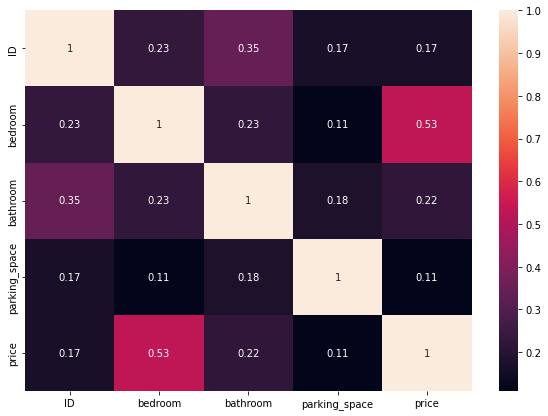

In [15]:
# visualizing correlation coefficients between the columns
corr = train_df.corr()
plt.figure(figsize = (10,7))
sns.heatmap(corr, annot = True);

- From the above we see bedroom has the highest correlation to price.

## Exploratory Data Analysis

In this section i will be asking a bunch of questions and finding answers within the dataset.This will give a better understanding of the dataset and its values.

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10531 entries, 0 to 13998
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             10531 non-null  int64  
 1   loc            10531 non-null  object 
 2   title          10531 non-null  object 
 3   bedroom        10531 non-null  float64
 4   bathroom       10531 non-null  float64
 5   parking_space  10531 non-null  float64
 6   price          10531 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 658.2+ KB


array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'bedroom'}>],
       [<AxesSubplot:title={'center':'bathroom'}>,
        <AxesSubplot:title={'center':'parking_space'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

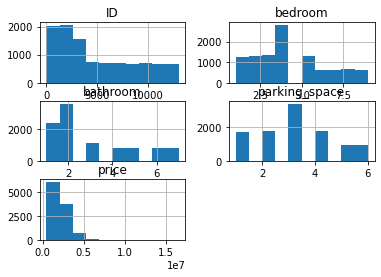

In [35]:
train_df.hist()

- I notice that the price column is rightly skewed

## Univariate visualizations

### What is the distribution of the location and title columns? Which state has the highest distribution?

In [25]:
train_df['loc'].sort_values().unique()

array(['Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauchi', 'Bayelsa',
       'Benue', 'Borno', 'Cross River', 'Delta', 'Ebonyi', 'Edo', 'Ekiti',
       'Enugu', 'Gombe', 'Imo', 'Jigawa', 'Kaduna', 'Kano', 'Katsina',
       'Kebbi', 'Kogi', 'Kwara', 'Lagos', 'Nasarawa', 'Niger', 'Ogun',
       'Ondo', 'Osun', 'Oyo', 'Plateau', 'Rivers', 'Sokoto', 'Taraba',
       'Yobe', 'Zamfara'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='loc'>

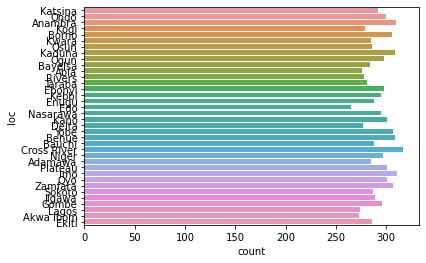

In [26]:
sns.countplot(y='loc', data= train_df)

In [27]:
train_df.title.value_counts()

Flat                    1182
Apartment               1147
Townhouse               1139
Semi-detached duplex    1133
Mansion                 1125
Detached duplex         1115
Penthouse               1103
Bungalow                1102
Terrace duplex          1095
Cottage                  390
Name: title, dtype: int64

In [28]:
train_df.describe()

,ID,bedroom,bathroom,parking_space,price
count,10531.000000,10531.000000,10531.000000,10531.000000,1.053100e+04
mean,4868.685405,4.296435,3.132763,3.164846,2.127767e+06
std,3815.291331,2.238021,1.866645,1.468318,1.069676e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1683.500000,3.000000,2.000000,2.000000,1.391271e+06
50%,3536.000000,4.282678,3.000000,3.088514,1.888006e+06
75%,8006.500000,5.000000,4.000000,4.000000,2.571146e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [29]:
plt.figure(figsize=[12,12])

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='title'>

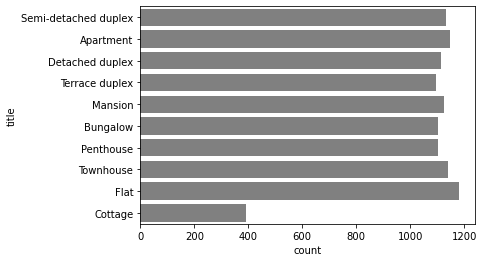

In [30]:
sns.countplot(data= train_df, y='title', color= 'gray', )

##anotate bars if there's time

### It is clear cottages are not as common as other house types in Nigeria

In [34]:
sns.countplot(data= train_df, y='title', x='' )

TypeError: cannot perform reduce with flexible type

<AxesSubplot:>

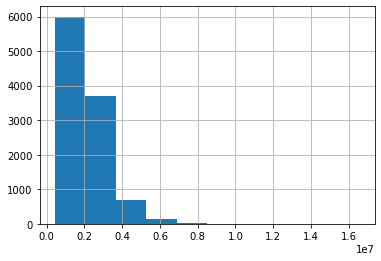

In [35]:

train_df.price.hist()


In [36]:
train_df.plot(x=avg(price))

NameError: name 'avg' is not defined

In [37]:
vv= train_df.groupby('title').price.avg()

AttributeError: 'SeriesGroupBy' object has no attribute 'avg'

### Preprocessing


In [38]:
# importing libraries required
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier

In [39]:
#importing libraries for modelling
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

In [40]:
#dropping price column and joining both train_df and test_df
all_data= train_df.drop(columns=['price'], axis=1).append(test_df)
all_data.shape

(16531, 6)

In [41]:
train_df.title.unique()

array(['Semi-detached duplex', 'Apartment', 'Detached duplex',
       'Terrace duplex', 'Mansion', 'Bungalow', 'Penthouse', 'Townhouse',
       'Flat', 'Cottage'], dtype=object)

In [42]:
all_data.title.unique()

array(['Semi-detached duplex', 'Apartment', 'Detached duplex',
       'Terrace duplex', 'Mansion', 'Bungalow', 'Penthouse', 'Townhouse',
       'Flat', 'Cottage'], dtype=object)

In [43]:
# Ranking the house titles
title_rank= {
    'Cottage': 1,
    'Flat': 2,
    'Apartment': 3 ,
    'Townhouse' : 4,
    'Terrace duplex': 5 ,
    'Semi-detached duplex':6 ,
    'Detached duplex': 7 ,
    'Bungalow' : 8,
    'Penthouse': 9 ,
    'Mansion': 10
}

In [44]:
# mapping the titles 
all_data['title']= all_data['title'].map(title_rank)

all_data.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,3583,Katsina,6,2.000000,2.0,1.0
1,2748,Ondo,3,4.386792,2.0,4.0
3,2224,Anambra,7,5.000000,2.0,4.0
4,10300,Kogi,5,4.367061,5.0,6.0
5,1733,Borno,10,4.341595,1.0,3.0


In [45]:
#normalizing the value_count of loc to create distinct figures rank
cat_frequency= all_data['loc'].value_counts(normalize=True)

# mapping the location to this
loc_rank= cat_frequency.to_dict()

loc_rank

{'Benue': 0.030064726876776963,
 'Borno': 0.029883249652168653,
 'Anambra': 0.02964128001935757,
 'Oyo': 0.029278325570140946,
 'Ogun': 0.029217833161938177,
 'Cross River': 0.029036355937329866,
 'Kaduna': 0.02873389389631601,
 'Zamfara': 0.0285524166717077,
 'Kano': 0.02849192426350493,
 'Nasarawa': 0.02824995463069385,
 'Ondo': 0.02824995463069385,
 'Katsina': 0.02824995463069385,
 'Yobe': 0.028189462222491076,
 'Kebbi': 0.028128969814288307,
 'Imo': 0.028007984997882766,
 'Bauchi': 0.028007984997882766,
 'Plateau': 0.027826507773274455,
 'Adamawa': 0.027826507773274455,
 'Niger': 0.027584538140463372,
 'Kogi': 0.027584538140463372,
 'Ekiti': 0.027584538140463372,
 'Osun': 0.02746355332405783,
 'Gombe': 0.02746355332405783,
 'Abia': 0.02728207609944952,
 'Sokoto': 0.027221583691246748,
 'Lagos': 0.027100598874841206,
 'Taraba': 0.027100598874841206,
 'Enugu': 0.027040106466638437,
 'Delta': 0.026979614058435665,
 'Ebonyi': 0.026919121650232896,
 'Jigawa': 0.026858629242030124,
 'Bay

In [46]:
# replacing values with the map
all_data['loc']= all_data['loc'].map(loc_rank)

#print new dataframe
all_data.head()


,ID,loc,title,bedroom,bathroom,parking_space
0,3583,0.028250,6,2.000000,2.0,1.0
1,2748,0.028250,3,4.386792,2.0,4.0
3,2224,0.029641,7,5.000000,2.0,4.0
4,10300,0.027585,5,4.367061,5.0,6.0
5,1733,0.029883,10,4.341595,1.0,3.0


In [47]:
all_data.shape

(16531, 6)

In [48]:
train_df.shape[0]==14000

False

In [98]:
# splitting all data into x, y and test_df 
x= all_data[:train_df.shape[0]]
y= train_df['price']
test_df= all_data[train_df.shape[0]:]

#checking the outcome
x.shape, y.shape, test_df.shape

((10531, 6), (10531,), (6000, 6))

In [50]:
x.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,3583,0.028250,6,2.000000,2.0,1.0
1,2748,0.028250,3,4.386792,2.0,4.0
3,2224,0.029641,7,5.000000,2.0,4.0
4,10300,0.027585,5,4.367061,5.0,6.0
5,1733,0.029883,10,4.341595,1.0,3.0


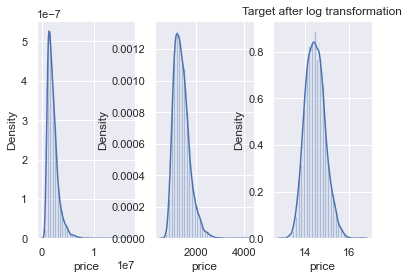

In [65]:
# copied

sns.set()
y_transformed = pd.Series(np.sqrt(y))
y_transformed_log  = pd.Series(np.log1p(y))
fig, ax = plt.subplots(1, 3)
sns.distplot(y, ax=ax[0])
plt.title("Target after Sqrt transformation")
# ax[0].axvline(y_transformed)
sns.distplot(y_transformed, ax=ax[1])

sns.distplot(y_transformed_log, ax=ax[2])
plt.title("Target after log transformation")
plt.show()


In [52]:
x.drop(['ID'], axis=1, inplace=True)

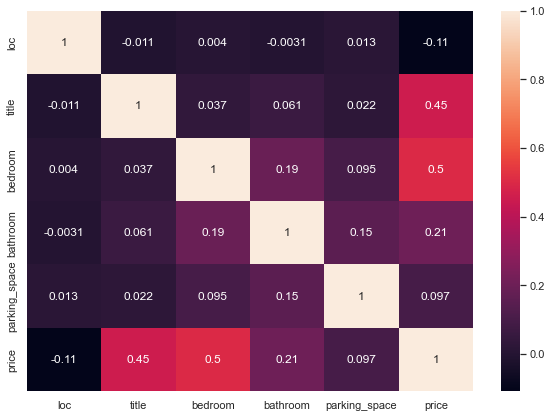

In [53]:
# visualizing correlation coefficients between the columns
v= x.copy()
v['price']= train_df.price
corr = v.corr()
plt.figure(figsize = (10,7))
sns.heatmap(corr, annot = True);

- the top three positively correlated with price are bedroom, title, bathroom. 
- i.e if they have a higher value they have a higher price...

### Modelling

In [54]:
# importing other models to test out 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [55]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10531 entries, 0 to 13998
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loc            10531 non-null  float64
 1   title          10531 non-null  int64  
 2   bedroom        10531 non-null  float64
 3   bathroom       10531 non-null  float64
 4   parking_space  10531 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 493.6 KB


### Testing models

In [57]:
#splitting train_df into data to train and one to test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

### LGBM Regressor

In [71]:
# calling the model function
lightb_model= LGBMRegressor()

#training/ fitting the model on the X_train, y_train data
lightb_model.fit(X_train, y_train)

#making the prediction on part of the train data
lightb_pred= lightb_model.predict(X_test)

# checking the mean squared error
print(f'mse = {mean_squared_error(y_test, lightb_pred, squared=False)}')


# printing the prediction
lightb_pred


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 95
[LightGBM] [Info] Number of data points in the train set: 8424, number of used features: 5
[LightGBM] [Info] Start training from score 2120076.643526
mse = 479110.58349600056


array([1176594.91362473, 2226153.27863344, 2960504.11391757, ...,
       3877578.96876843, 3065726.35921785, 1878835.82024901])

- rmse = 479110.58

### CatBoost Regressor

In [115]:
# calling the model function
catb_model= CatBoostRegressor(verbose=0)

#training/ fitting the model on the X_train, y_train data
catb_model.fit(X_train, y_train)

#making the prediction on part of the train data
catb_pred= catb_model.predict(X_test)

# checking the mean squared error
print(f'mse = {mean_squared_error(y_test, catb_pred, squared=False)}')

# printing the prediction

catb_pred

mse = 473562.69391609996


array([1232422.10382487, 2116234.91292518, 2889435.90947451, ...,
       3649751.86505762, 3059009.57076461, 1826694.74879306])

- rmse= 486129.81

In [125]:
fold_pred=[]
oof_pred = []

params = {
    'n_estimators': 500,
    'colsample_bytree': 0.86,
 'learning_rate': 0.032,
 'max_depth': 7,
 'subsample': 0.85}


fold = KFold(n_splits=7, shuffle=True)#15#5#10
i=1
for train_index, test_index in fold.split(x,y):     
  
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = np.log1p(y.iloc[train_index]), y.iloc[test_index]

    model = LGBMRegressor(**params, objective = "rmse")
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)])#erly100

    preds= model.predict(X_test)
    print("err: ",(mean_squared_error(y_test,np.expm1(preds), squared=False)))  #Reverse transformation
    oof_pred.append(mean_squared_error(y_test,np.expm1(preds),squared=False))
    p2 = model.predict(test_df[x.columns])
    fold_pred.append(np.expm1(p2))
    

print(np.mean(oof_pred))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 350
[LightGBM] [Info] Number of data points in the train set: 9026, number of used features: 6
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 14.466718
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

### Gradient Booster

In [126]:
# calling the model function
lgbm_model= LGBMRegressor(verbose=0)

#training/ fitting the model on the X_train, y_train data
lgbm_model.fit(X_train, y_train)

#making the prediction on part of the train data
lgbm_pred= lgbm_model.predict(X_test)

# checking the mean squared error
print(f'mse = {mean_squared_error(y_test, lgbm_pred, squared=False)}')


# printing the prediction
lgbm_pred

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000419 seconds.
You can set `force_col_wise=true` to remove the overhead.
mse = 2385906.423859324


array([14.04126967, 14.25696453, 14.39521641, ..., 15.12390409,
       14.35305672, 14.73034049])

In [108]:
from lightgbm import LGBMClassifier

In [117]:
# calling the model function
lgbm_model= LGBMClassifier()

#training/ fitting the model on the X_train, y_train data
lgbm_model.fit(X_train, y_train)

#making the prediction on part of the train data
lgbm_pred= lgbm_model.predict(X_test)

# checking the mean squared error
print(f'mse = {mean_squared_error(y_test, lgbm_pred, squared=False)}')


# printing the prediction
lgbm_pred

ValueError: Unknown label type: 'continuous'

### Creating Submission file

In [121]:
# testing prediction model
def testModel(x):
    # creating copy of test_df to predict
    toPredict= test_df.copy()

    #converting the price prediction to a column in toPredict_df
    toPredict['price'] =x.predict(toPredict_df)
    
    model_name= str(x) + "_model"
    
    #selecting the needed columns as seen in sample submission
    model_submission= toPredict[['ID', 'price']]
    
    #converting dataframe back to csv file
    model_sub3.to_csv('model_sub3.csv', index=False)


'you_model'

In [119]:

toPredict['price']= _model.predict(test_df)

model_sub.head()

NotFittedError: Estimator not fitted, call fit before exploiting the model.

In [93]:
test_df.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,845,0.028492,9,4.0,1.0,2.0,2294956.750
1,1924,0.027827,3,2.0,2.0,4.0,1053011.625
2,10718,0.027827,8,2.0,7.0,2.0,1183945.625
3,12076,0.027101,10,9.0,5.0,2.0,6446112.500
4,12254,0.027464,6,5.0,6.0,1.0,1992776.125


### Saving submission file

In [ ]:
#converting dataframe back to csv file
model_sub3.to_csv('model_sub3.csv', index=False)